In [24]:
#install.packages('factoextra')
#install.packages('fpc')


The downloaded binary packages are in
	/var/folders/1z/2yqw51dn0pd8dy0fq2s881sr0000gn/T//RtmpAuE70y/downloaded_packages

The downloaded binary packages are in
	/var/folders/1z/2yqw51dn0pd8dy0fq2s881sr0000gn/T//RtmpAuE70y/downloaded_packages


In [23]:
# Load necessary library
library(dplyr)

# Load the dataset
dataset <- read.csv("bananaindex.csv")
head(dataset)
tail(dataset)

,entity,year,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,Land.use.per.100.grams.of.protein,Land.use.per.100.grams.of.fat,Bananas.index..kg.,Bananas.index..1000.kcalories.,Bananas.index..100g.protein.,Chart.,type,Banana.values,Unnamed..16
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>
1,Ale,2022,0.4886899,0.31733796,0.8785246,2.42420853,0.8114852,0.6011524,1.577687,3.065766,0.5595581,0.36233960,0.11377099,True,1,Per KG,0.8733496
2,Almond butter,2022,0.3870113,0.06726478,0.2075993,0.07910323,7.6830451,1.2968698,3.608433,1.495297,0.4431345,0.07680359,0.02688460,True,1,Per 1000 kcalories,0.8758026
3,Almond milk,2022,0.6558875,2.22223000,13.5955120,4.05747018,1.3701059,2.6750626,12.687839,4.600530,0.7510023,2.53736407,1.76065052,True,1,Per 100g protein,7.7218686
4,Almonds,2022,0.6023679,0.10502863,0.3283350,0.11936143,8.2309268,1.4233758,4.261040,1.610136,0.6897214,0.11992272,0.04252015,True,1,,NA
5,Apple juice,2022,0.4583784,0.95518371,29.1522123,19.75497950,0.6606295,1.3828391,43.232158,26.246743,0.5248510,1.09063815,3.77527951,True,1,,NA
6,Apple pie,2022,1.2449737,0.41818179,4.7041713,2.58549213,1.7651650,0.5973741,6.471804,3.819800,1.4255159,0.47748408,0.60920116,True,3,,NA


,entity,year,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,Land.use.per.100.grams.of.protein,Land.use.per.100.grams.of.fat,Bananas.index..kg.,Bananas.index..1000.kcalories.,Bananas.index..100g.protein.,Chart.,type,Banana.values,Unnamed..16
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>
155,Tomatoes,2022,2.2715155,11.7280790,28.672932,100.3294300,0.8890183,4.591352,11.229250,39.172079,2.600924,13.3912360,3.7132115,True,1,,NA
156,Tortilla wraps,2022,0.9485837,0.3936476,1.260451,1.6583478,2.2561128,0.979229,2.979443,4.106024,1.086144,0.4494707,0.1632313,True,1,,NA
157,Tuna,2022,13.0753549,9.9696081,4.972586,105.1136320,5.5218398,4.194251,2.167108,44.058029,14.971502,11.3833966,0.6439615,True,2,,NA
158,Walnuts,2022,2.4163078,0.4095802,1.725508,0.4924563,11.8758518,1.924057,7.828816,2.092320,2.766713,0.4676627,0.2234573,True,1,,NA
159,Watermelon,2022,0.9694027,2.4640874,16.335799,22.1100167,1.0098785,2.616771,17.232334,22.874311,1.109983,2.8135192,2.1155240,True,1,,NA
160,Yoghurt,2022,3.1118107,3.9866625,8.365670,33.6203562,3.2097210,4.120987,8.586253,34.333541,3.563076,4.5520104,1.0833738,True,3,,NA


In [25]:
# Remove specified columns,not useful columns
unique(dataset$Banana.values)
unique(dataset$year)
unique(dataset$Chart)
unique(dataset$type)
unique(dataset$Unnamed..16)
columns_to_remove <- c("year", "Banana.values", "Chart.","type","Unnamed..16")
dataset <- dataset %>% select(-one_of(columns_to_remove))

# Remove rows with missing values
dataset <- sum(is.na(dataset))
dataset <- na.omit(dataset)

# Print the first few rows of the modified dataset
head(dataset)


[1] "Per KG"             "Per 1000 kcalories" "Per 100g protein"  
[4] ""

[1] 2022

[1] "True"

[1] 1 3 2

[1] 0.8733496 0.8758026 7.7218686        NA

[1] 4

In [ ]:
# Load necessary libraries
library(readr)
library(cluster)

# Identify numeric columns
numeric_cols <- sapply(dataset, is.numeric)

# Select only numeric columns
numeric_dataset <- dataset[, numeric_cols]

# Calculate correlation matrix
cor_matrix <- cor(numeric_dataset)

# Find the pair of columns with the highest absolute correlation
min_correlation <- min(cor_matrix[which(cor_matrix != 1)], na.rm = TRUE)
indices <- which(cor_matrix == min_correlation, arr.ind = TRUE)

# Get the column names with the highest correlation
best_columns <- colnames(numeric_dataset)[indices[1, ]]

# Print the result
cat("Best two numeric columns for clustering:", best_columns[1], "and", best_columns[2], "\n")


Best two numeric columns for clustering: Bananas.index..100g.protein. and land_use_kg 


In [ ]:
dataset_sub =  dataset[,best_columns]

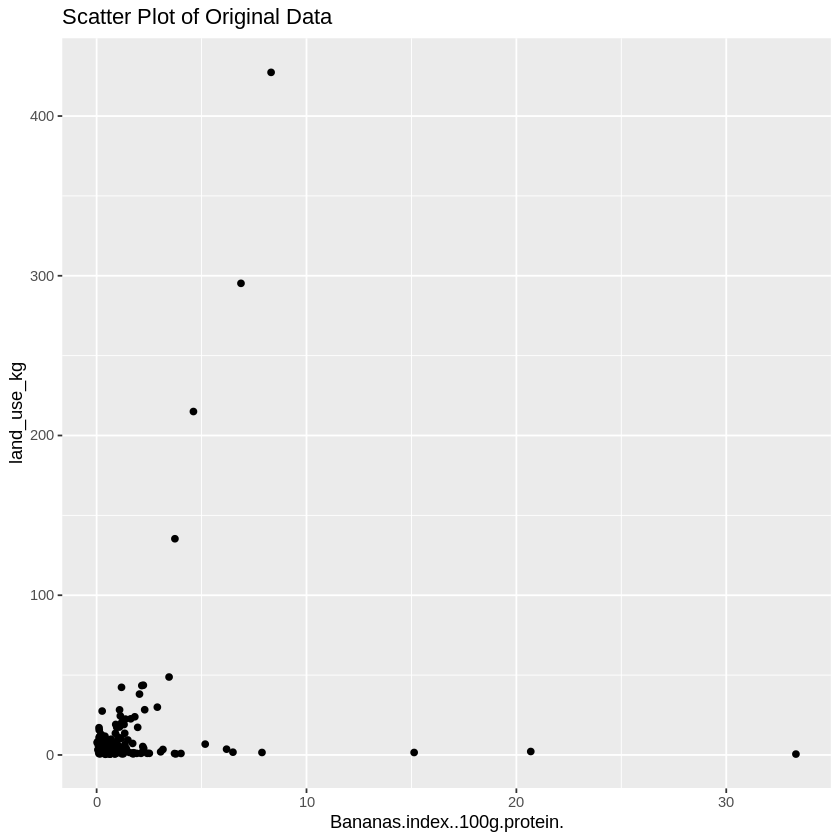

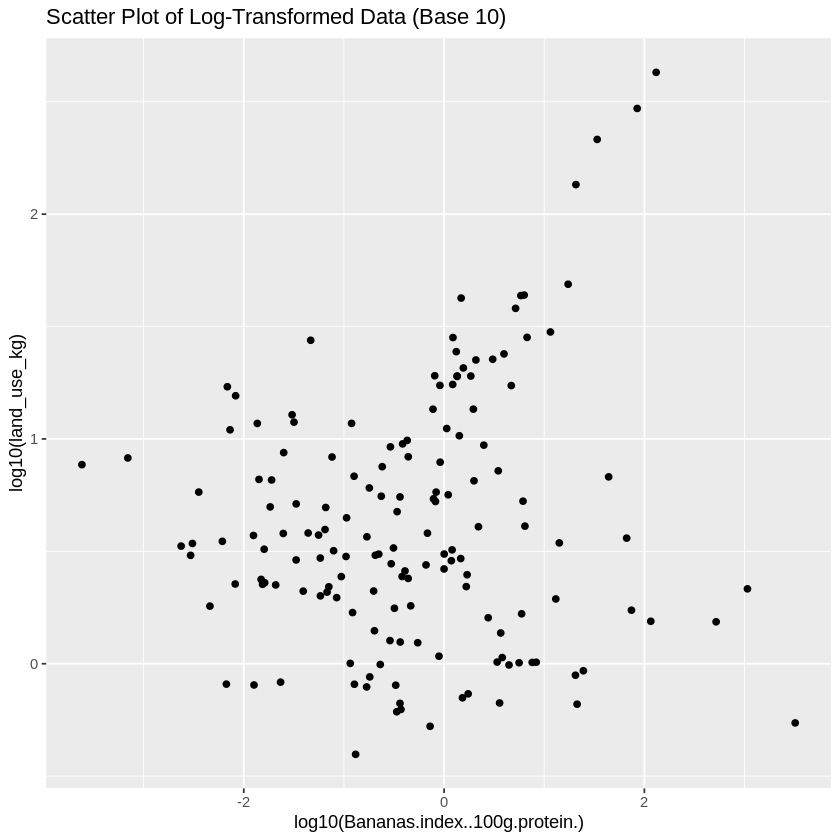

In [ ]:
# Assuming 'dataset_sub' is your dataframe and 'best_columns' contains the column names

# Load necessary libraries
library(ggplot2)

# Scatter plot of the original data
original_plot <- ggplot(dataset_sub, aes(x = dataset_sub[, best_columns[1]], y = dataset_sub[, best_columns[2]])) +
  geom_point() +
  labs(title = "Scatter Plot of Original Data",
       x = best_columns[1],
       y = best_columns[2])

# Scatter plot of the log-transformed data (base 10)
log_transformed_plot <- ggplot(dataset_sub, aes(x = log(dataset_sub[, best_columns[1]]), y = log10(dataset_sub[, best_columns[2]]))) +
  geom_point() +
  labs(title = "Scatter Plot of Log-Transformed Data (Base 10)",
       x = paste("log10(", best_columns[1], ")", sep = ""),
       y = paste("log10(", best_columns[2], ")", sep = ""))

# Display both plots
original_plot
log_transformed_plot


log-transformed data shows a more uniform spread and the spread is more suitable for clustering, it might be beneficial to use the log-transformed data.

In [ ]:
dataset_sub = log(dataset_sub)

In [ ]:
# Assuming 'log_transformed_data' is your log-transformed dataset
rows_with_minus_inf <- apply(dataset_sub, 1, function(row) any(row == -Inf))

# Count the number of rows with -Inf values
num_rows_with_minus_inf <- sum(rows_with_minus_inf)

# Print the result
cat("Number of rows with -Inf values:", num_rows_with_minus_inf, "\n")


Number of rows with -Inf values: 0 


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



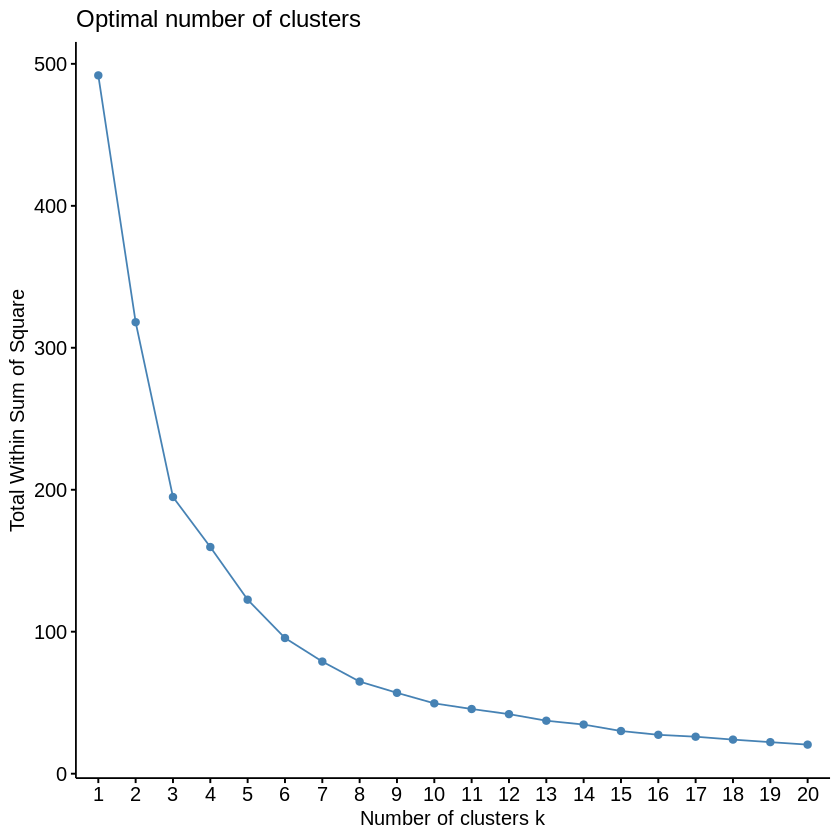

In [ ]:
library(factoextra)
fviz_nbclust(dataset_sub, pam, method = "wss", k.max = 20)


the elbow method is like finding the sweet spot for the number of clusters (k) in k-means. here, we plotted k against the within-cluster sum of squares (WCSS). Initially, adding more clusters lowers WCSS, but at some point, the gain isn't as significant – that's the "elbow." here we chose k=6 because that's where the curve bends and adding more clusters doesn't give much extra benefit. It's a trade-off: capturing patterns while keeping things simple. The elbow method helps strike that balance based on the data.

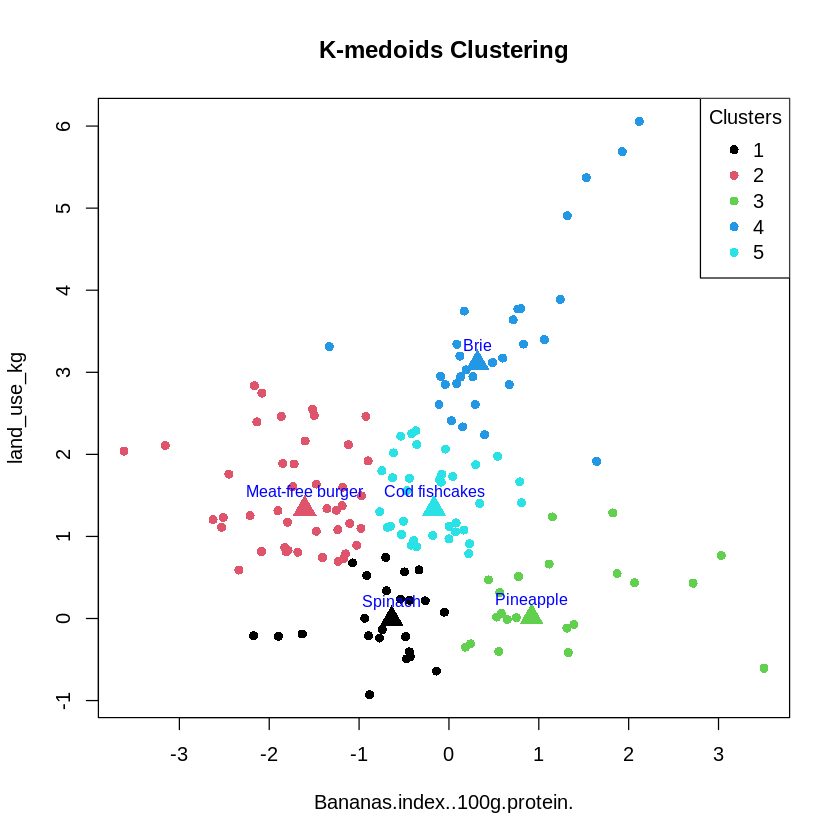

In [ ]:
# Assuming 'dataset_sub' is your dataframe and 'food_names_list' is the list of food names

# Load necessary libraries
library(cluster)
library(factoextra)
library(ggplot2)  # Load ggplot2 for geom_text()

# Specify the number of clusters (k)
k <- 5

# Perform k-medoids clustering
optimal_pam_result <- pam(dataset_sub, k = k)  # Exclude the first column (assumed to be food names)

# Plot the clusters and annotate with medoid names
plot(dataset_sub, col = optimal_pam_result$clustering, pch = 16, main = "K-medoids Clustering")
points(optimal_pam_result$medoids, col = 1:optimal_k, pch = 17, cex = 2)  # Markers for medoids

# Annotate medoids with food names
medoid_labels <- annotation_labels <- dataset[rownames(optimal_pam_result$medoids),]$entity # Replace with your actual food names
text(optimal_pam_result$medoids, labels = medoid_labels, pos = 3, col = "blue", cex = 0.8)

# Display the plot
legend("topright", legend = 1:optimal_k, col = 1:optimal_k, pch = 16, title = "Clusters")

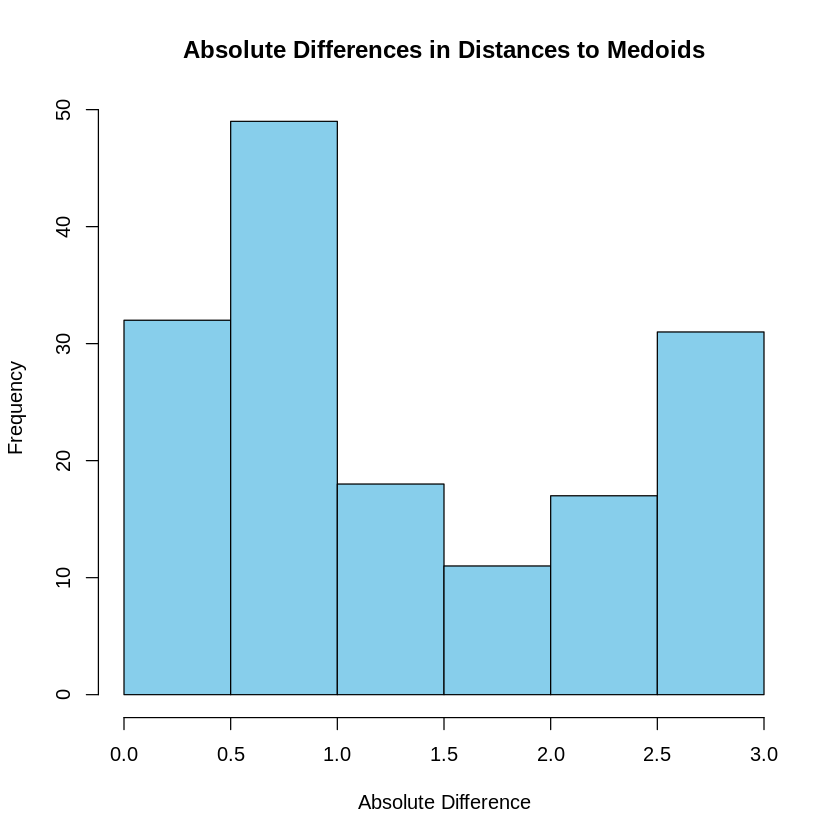

In [ ]:
# Assuming you have the required libraries installed
library(cluster)

# Set the number of clusters (k)
k <- 2

# Perform k-medoids clustering
pam_result <- pam(dataset_sub, k)

# Get the medoids indices
medoids_indices <- pam_result$medoids

# Get the medoids (cluster centers)
medoids <- dataset_sub[medoids_indices, ]

# Calculate distances for each point to each medoid (2D space)
distances <- matrix(NA, nrow = nrow(dataset_sub), ncol = k)
for (i in 1:k) {
  distances[, i] <- sqrt(rowSums((dataset_sub - pam_result$medoids[i, ])^2))
}

# Calculate absolute differences between distances
abs_diff_distances <- apply(distances, 1, function(x) abs(diff(x)))

# Display the set of distances on a histogram
hist(abs_diff_distances, main = "Absolute Differences in Distances to Medoids", xlab = "Absolute Difference", col = "skyblue", border = "black")

In [ ]:
# Assuming 'dataset_sub' is your original dataset
# Assuming 'pam_result' is the result of your PAM clustering
# Assuming 'k' is set to 2

# Extract the cluster assignments from the PAM result
cluster_assignments <- pam_result$clustering

# Create a new data frame with the cluster assignments
clustered_data <- data.frame(dataset, Cluster = cluster_assignments)


# Create a data frame with values of "entity" for each cluster
cluster_df <- clustered_data %>%
  group_by(Cluster) %>%
  summarise(Entity_Values = toString(unique(entity)))

# Display the data frame
print(cluster_df)

# A tibble: 2 × 2
  Cluster Entity_Values                                                         
    <int> <chr>                                                                 
1       1 Ale, Almond butter, Almond milk, Almonds, Apple juice, Apple pie, App…
2       2 Bacon, Beans, Beef burger, Beef meatballs, Beef mince, Beef steak, Be…


In [ ]:
cluster_df

Cluster,Entity_Values
<int>,<chr>
1,"Ale, Almond butter, Almond milk, Almonds, Apple juice, Apple pie, Apples, Asparagus, Avocados, Bagels, Baguette, Banana loaf, Bananas, Beer, Bread, Breakfast cereal, Broccoli, Cabbage, Caesar salad, Carrot cake, Carrots, Cauliflower, Cereal bars, Cheesecake, Cherry tomatoes, Chia seeds, Chicken burger, Coconut milk, Coconut oil, Cod, Cod fish fingers, Cod fishcakes, Courgettes, Couscous, Cow’s milk, Cracker biscuits, Croissants, Cucumber, Doughnuts, Egg noodles, Eggs, Falafels, Frozen chips (french fries), Frozen onion rings, Frozen potato wedges, Frozen roast potatoes, Frozen sweet potato fries, Fruit cake, Garden peas, Granola, Grapes, Ice lollies, Kale, Kiwis, Lemons, Limes, Marmalade, Meat-free burger, Meat-free mince, Meat-free sausages, Melon, Muesli, Muffins, Mushrooms, Naan, Nut loaf, Oat milk, Onions, Orange juice, Oranges, Pancakes, Parsnips, Pasta shells, Peanut butter, Pears, Penne pasta, Peppers, Pineapple, Pitta bread, Popcorn, Poppadoms, Porridge (oatmeal), Potatoes, Prawns, Pumpkin seeds, Quinoa, Raspberries, Rice, Rice noodles, Salmon, Shortbread biscuits, Sourdough bread, Soy milk, Spaghetti, Spinach, Sponge cake, Strawberries, Sunflower seeds, Sweetcorn, Tofu, Tomato ketchup, Tomatoes, Tortilla wraps, Tuna, Watermelon, Yoghurt"
2,"Bacon, Beans, Beef burger, Beef meatballs, Beef mince, Beef steak, Beetroot, Biscuits, Blue cheese, Brazil nuts, Brie, Butter, Camembert, Cashew nuts, Cheddar cheese, Chicken breast, Chicken sausages, Chicken thighs, Chicken wings, Chickpeas, Chilli con carne, Chocolate biscuits, Chocolate cake, Chocolate cheesecake, Chocolate spread, Cottage cheese, Crisps, Dark chocolate, Feta cheese, Goat’s cheese, Halloumi cheese, Ice cream, Lamb (leg), Lamb burgers, Lamb chops, Lentils, Lettuce, Macaroni cheese, Mackerel, Milk chocolate, Mozzarella cheese, Parmesan cheese, Peanuts, Pecan nuts, Pork chops, Pork sausages, Protein bar, Protein shake, Rapeseed oil, Ricotta cheese, Sugar, Walnuts"


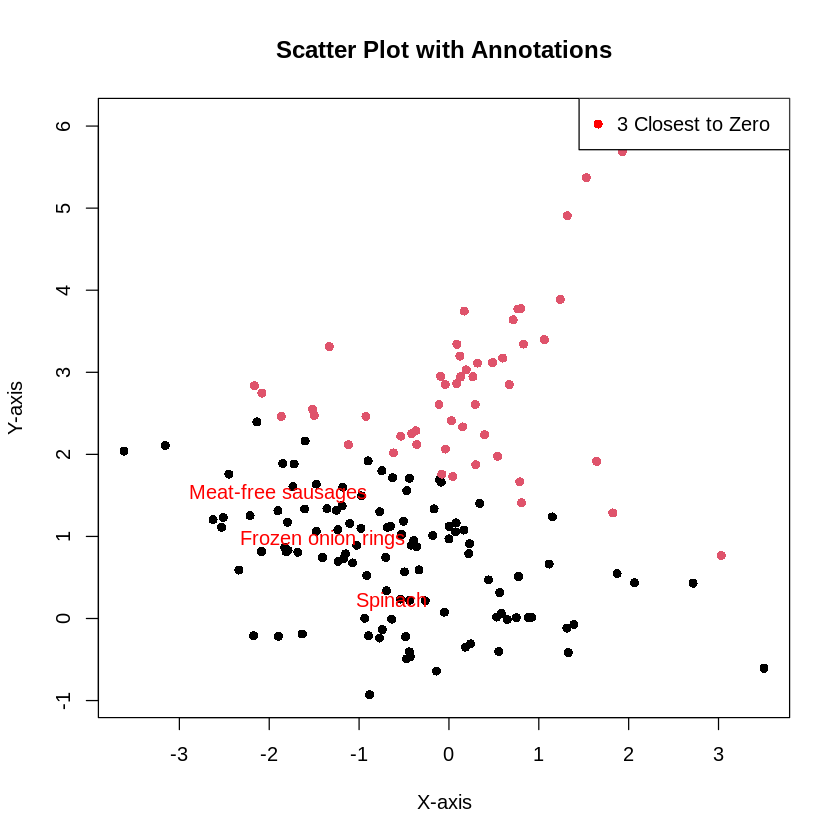

In [ ]:
# Find the indices of the 3 smallest absolute differences
closest_to_zero_indices <- order(abs_diff_distances)[1:3]

# Extract the corresponding data points
closest_to_zero_points <- dataset_sub[closest_to_zero_indices, ]

# Plot the scatter plot
plot(dataset_sub, col = pam_result$clustering, pch = 16, main = "Scatter Plot with Annotations", xlab = "X-axis", ylab = "Y-axis")

# Annotate the 3 closest points
text(closest_to_zero_points[, 1], closest_to_zero_points[, 2], labels = dataset[closest_to_zero_indices,]$entity, pos = 3, col = "red")

# Add a legend
legend("topright", legend = "3 Closest to Zero", col = "red", pch = 16)

# Display the plot


cluster 1 is more plant-based and includes a wide range of fruits, vegetables, and plant-based protein sources like tofu and meat alternatives.
cluster2 contains more animal-based products, including various types of meat, cheese, and dairy.

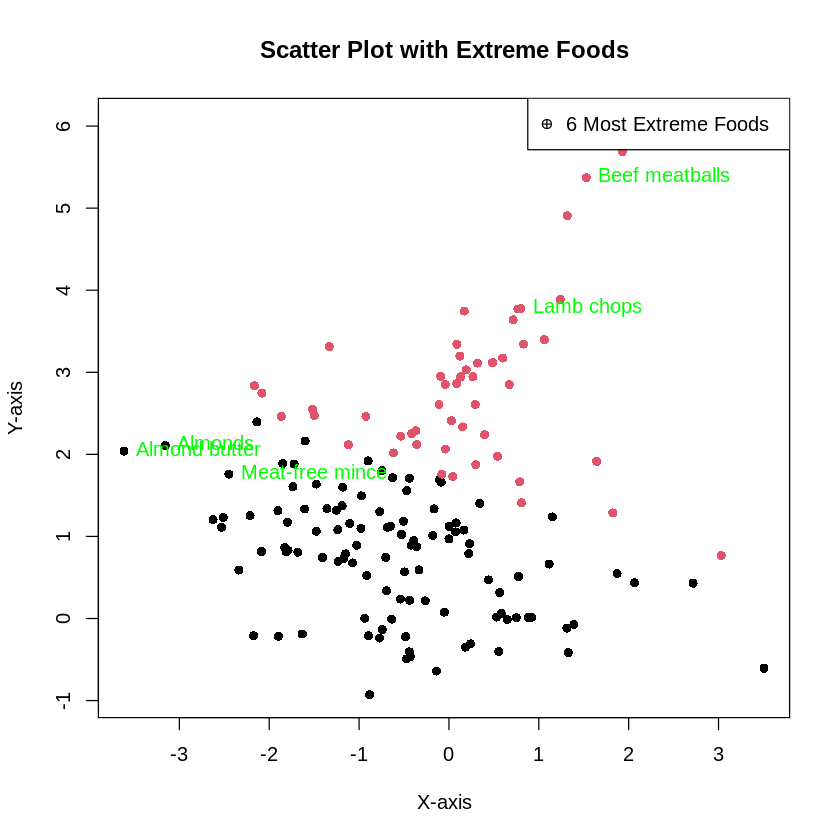

In [ ]:
# Construct a metric for distance from medoids (e.g., sum of distances)
extreme_metric <- rowSums(distances)

# Find the indices of the 6 largest values (most extreme)
extreme_indices <- order(extreme_metric, decreasing = TRUE)[1:6]

# Extract the corresponding data points
extreme_points <- dataset_sub[extreme_indices, ]

# Plot the scatter plot
plot(dataset_sub, col = pam_result$clustering, pch = 16, main = "Scatter Plot with Extreme Foods", xlab = "X-axis", ylab = "Y-axis")

# Annotate the 6 most extreme points
text(extreme_points[, 1], extreme_points[, 2], labels = dataset[rownames(extreme_points),]$entity, pos = 4, col = "green")

# Add a legend
legend("topright", legend = "6 Most Extreme Foods", col = "black", pch = 10)

# Display the plot
